In [1]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import ants

In [2]:
base_dir = "colin"
files = os.listdir(base_dir)

In [3]:
files[3]

'colin_HR.nii.gz'

In [4]:
colin_HR = sitk.ReadImage(base_dir + "/" + files[3])

In [5]:
base_dir = "mni_colin27_1998_nifti"
files = os.listdir(base_dir)
colin_LR = sitk.ReadImage(base_dir + "/" + files[1])
colin_LR_mask = sitk.ReadImage(base_dir + "/" + files[2])

In [6]:
files

['colin27_t1_tal_lin_headmask.nii',
 'colin27_t1_tal_lin.nii',
 'colin27_t1_tal_lin_mask.nii']

In [7]:
colin_HR_array = sitk.GetArrayFromImage(colin_HR)

In [8]:
colin_LR_array = sitk.GetArrayFromImage(colin_LR)
colin_LR_mask = sitk.GetArrayFromImage(colin_LR_mask)

In [46]:
colin_LR_array.shape

(181, 217, 181)

In [47]:
colin_LR_array[:,:,idx:181].shape

(181, 217, 166)

In [48]:
colin_LR_array[:,:,181].shape

IndexError: index 181 is out of bounds for axis 2 with size 181

In [ ]:
import ants

In [107]:
temp = ants.n4_bias_field_correction(ants.from_numpy(colin_HR_array))

AttributeError: module 'ants' has no attribute 'n4_bias_field_correction'

In [ ]:
dir(ants)

In [10]:
# colin_HR_array /= colin_HR_array.max(axis=(0,1,2), keepdims=True)

In [11]:
idx = 90

In [12]:
colin_HR_array.min()

-3784.6526

In [13]:
# hr /= hr.max(axis=(0,1), keepdims=True)

In [14]:
def sample(idx):
    lr = colin_LR_array[:,:,idx]
    hr = colin_HR_array[:,:,idx*2]
    hr = (hr - hr.min())/(hr.max() - hr.min())
    lr = (lr - lr.min())/(lr.max() - lr.min())
    return lr,hr

In [15]:
sample(90)[0].shape

(181, 217)

In [16]:
sample(90)[1].shape

(362, 434)

In [89]:

from skimage.metrics import structural_similarity as ssim
from skimage.transform import rescale, resize, downscale_local_mean
from imresize import imresize

In [92]:
imresize(sample(i)[0],output_shape = (362,434))

array([[ 3.59779935e-02,  3.97553705e-02,  4.73101247e-02, ...,
         5.46740551e-01,  5.46621759e-01,  5.46562364e-01],
       [ 3.60400710e-02,  3.97073536e-02,  4.70419189e-02, ...,
         5.41977774e-01,  5.41168864e-01,  5.40764409e-01],
       [ 3.61642260e-02,  3.96113198e-02,  4.65055075e-02, ...,
         5.32452219e-01,  5.30263073e-01,  5.29168500e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.77809701e-03,  2.23803582e-03,  2.46800523e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.52596147e-04,  5.71397469e-04,  6.30798130e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.10154282e-04, -2.61921707e-04, -2.87805419e-04]])

In [93]:
i=90
ssim(imresize(sample(i)[0],output_shape = (362,434)),sample(i)[1])

/home/arihant/miniconda3/lib/python3.10/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


0.5857840078302218

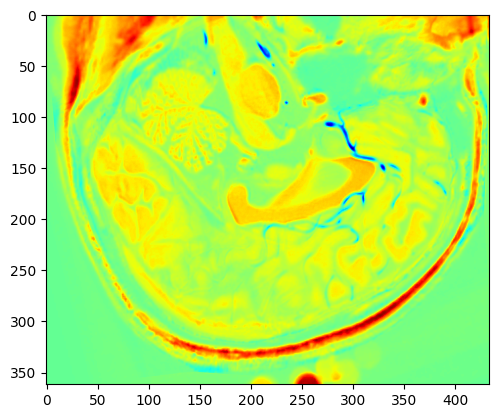

In [100]:
plt.figure()
i=90
plt.imshow(imresize(sample(i)[0],output_shape = (362,434))-sample(i)[1],cmap='jet')

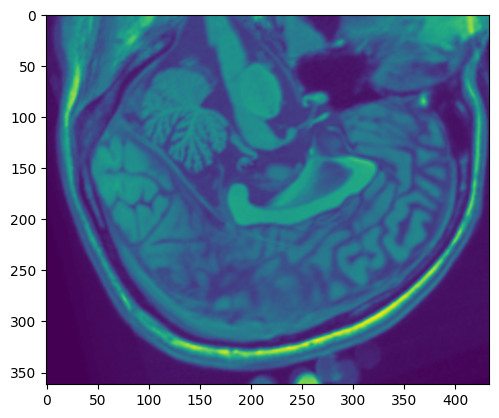

In [102]:
plt.imshow(imresize(sample(i)[0],output_shape = (362,434)))

In [95]:
temp = []
for i in range(181):
    temp.append(ssim(resize(sample(i)[0],output_shape = (362,434),order=1),sample(i)[1]))
# print(temp/181)

In [83]:
temp1 = []
for i in range(181):
    temp1.append(ssim(resize(sample(i)[0],(362,434),order=3),sample(i)[1]))
# print(temp/181)

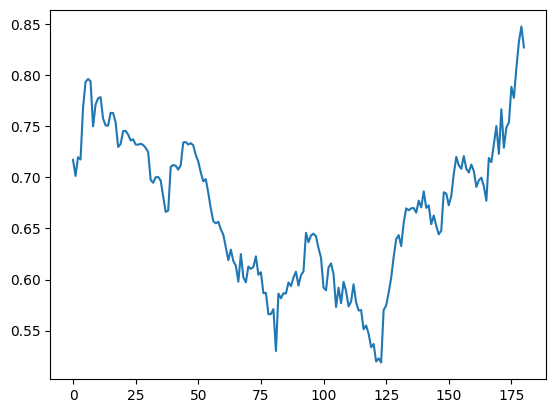

In [96]:
plt.plot(temp)

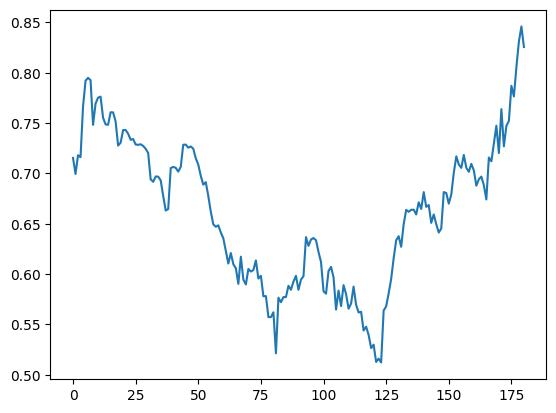

In [97]:
plt.plot(temp1)

In [72]:
temp = 0
for i in range(181):
    temp += ssim(resize(sample(i)[0],(362,434),order=3),sample(i)[1])
print(temp/181)

0.6628190206314818


In [51]:
sample(90)[0].shape

(181, 217)

In [63]:
temp = 0
for i in range(181):
    temp += ssim(downscale_local_mean(sample(i)[1][:,:], (2, 2)),sample(i)[1][::2,::2])
print(temp/181)

0.9849682154511235


In [81]:
# lr /= lr.max(axis=(0,1), keepdims=True)

In [82]:
lr = (lr - lr.min())/(lr.max() - lr.min())

In [83]:
lr.min()

0.0

In [50]:
hr_3 = np.stack([hr,hr,hr],axis=2)

In [51]:
type(hr_3)

numpy.ndarray

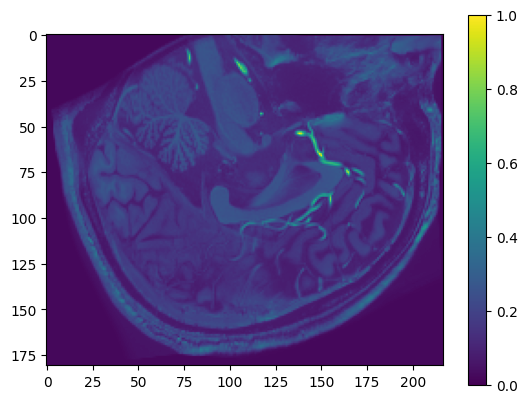

In [94]:
plt.imshow(hr)
plt.colorbar()

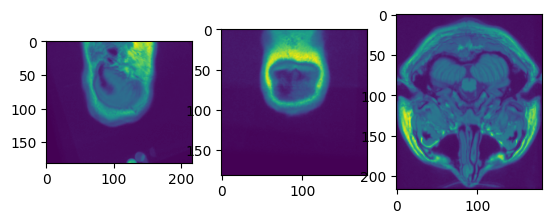

In [42]:
figure, axis = plt.subplots(1, 3)
idx = 15

axis[0].imshow(colin_LR_array[:,:,idx])
axis[1].imshow(colin_LR_array[:,idx,:])
axis[2].imshow(colin_LR_array[idx,:,:])

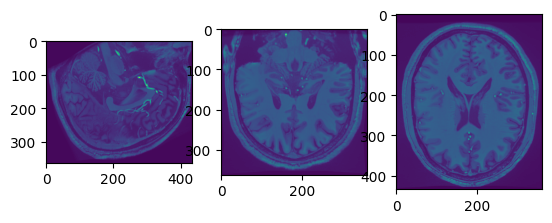

In [33]:
figure, axis = plt.subplots(1, 3)

axis[0].imshow(colin_HR_array[:,:,idx*2])
axis[1].imshow(colin_HR_array[:,idx*2,:])
axis[2].imshow(colin_HR_array[idx*2,:,:])

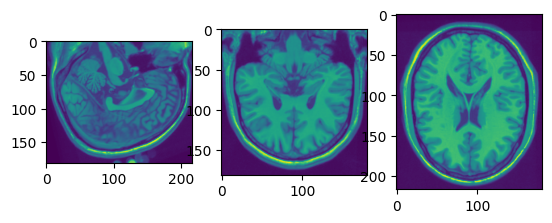

In [31]:
figure, axis = plt.subplots(1, 3)

axis[0].imshow(colin_LR_array[:,:,idx])
axis[1].imshow(colin_LR_array[:,idx,:])
axis[2].imshow(colin_LR_array[idx,:,:])

In [56]:
# colin_LR_array /= colin_LR_array.max(axis=(0,1,2), keepdims=True)

In [66]:
# hr_2 = hr[::2,::2]

In [67]:
# colin_LR_array[:,:,idx] /= colin_LR_array[:,:,idx].max(axis=(0,1), keepdims=True)

In [68]:
hr_2.shape

(181, 217)

In [90]:
hr.min(),hr.max()

(0.0, 1.0)

In [91]:
lr.min(),lr.max()

(0.0, 1.0)

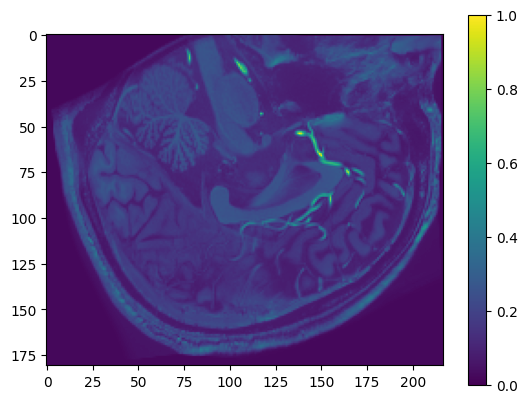

In [84]:
plt.imshow(hr)
plt.colorbar()

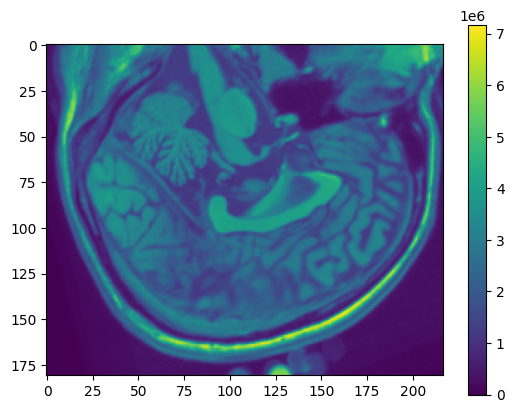

In [19]:
plt.imshow(colin_LR_array[:,:,idx])
plt.colorbar()

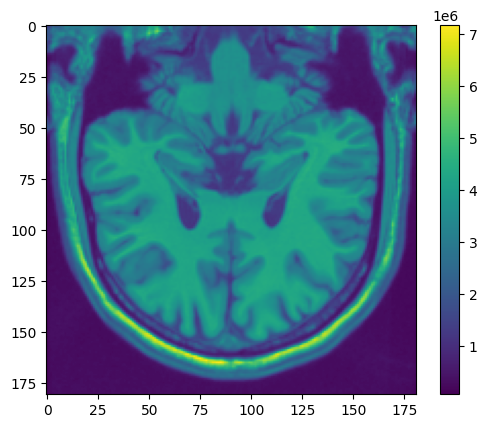

In [21]:
plt.imshow(colin_LR_array[:,idx,:])
plt.colorbar()

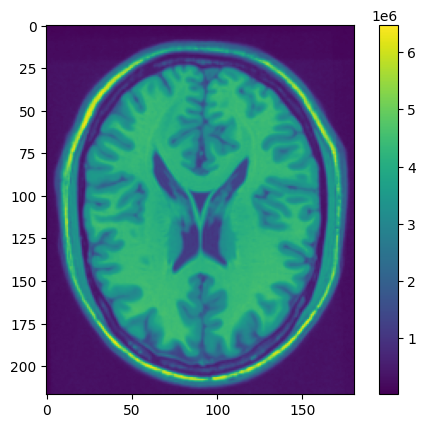

In [22]:
plt.imshow(colin_LR_array[idx,:,:])
plt.colorbar()

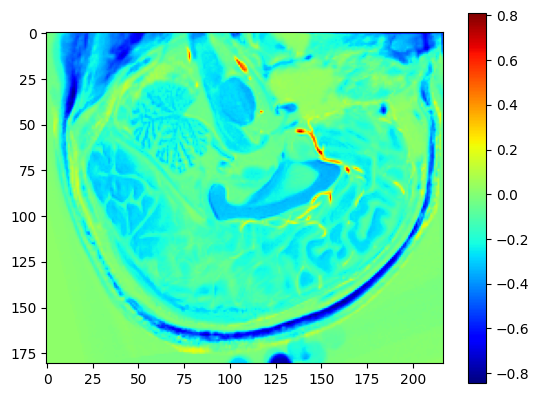

In [92]:
plt.imshow(hr - lr,cmap='jet')
plt.colorbar()

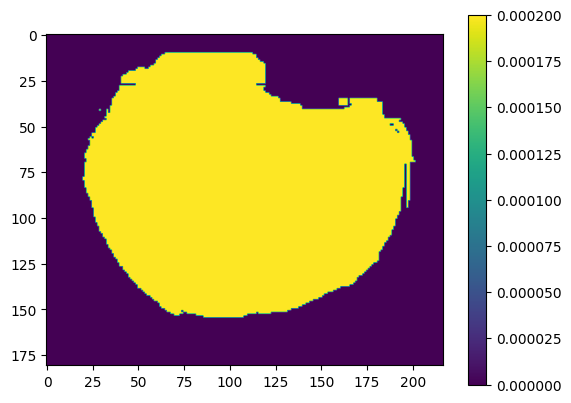

In [42]:
plt.imshow(colin_LR_mask[:,:,90]/5000)
plt.colorbar()

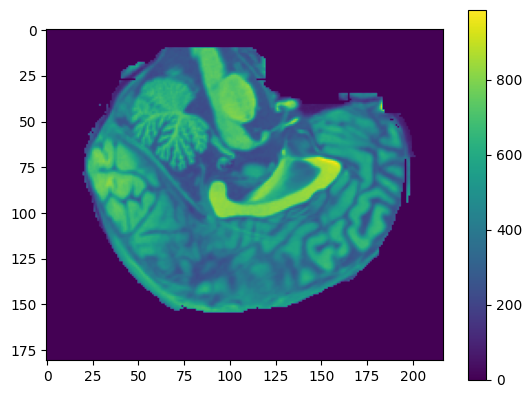

In [43]:
colin_LR_applied = colin_LR_array * colin_LR_mask
plt.imshow(colin_LR_applied[:,:,90]/5000)
plt.colorbar()

In [26]:
colin_HR.GetSpacing(),colin_HR.GetSize()

((0.5, 0.5, 0.5), (362, 434, 362))

In [27]:
colin_LR.GetSpacing(),colin_LR.GetSize()

((1.0, 1.0, 1.0), (181, 217, 181))